In [1]:
%matplotlib nbagg
%load_ext autoreload

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from libertem.api import Context
from libertem.executor.inline import InlineJobExecutor
from libertem.utils.generate import cbed_frame

In [3]:
from libertem_blobfinder.common.patterns import BackgroundSubtraction
from libertem_blobfinder.udf.integration import IntegrationUDF

In [4]:
ctx = Context(executor=InlineJobExecutor())

In [5]:
indices = np.mgrid[-3:4, -3:4]
a = (15, 1)
b = (-1, 17)
zero = (62, 63)

In [6]:
data = np.zeros((2, 2, 128, 128), dtype=np.float32)
peaks = np.zeros((2, 2, 49, 2), dtype=int)

In [7]:
ref_frame, _, _ = cbed_frame(
    fy=128, fx=128,
    zero=zero,
    a=a,
    b=b,
    indices=np.mgrid[0:1, 0:1],
    radius=4,
    all_equal=True,
    margin=2
)

In [8]:
for y in range(2):
    for x in range(2):
        (data[y, x], _, peaks[y, x]) = cbed_frame(
            fy=128, fx=128,
            zero=(zero[0] + 3*y, zero[1] + 4*x),
            a=(a[0] - y, a[1]),
            b=(b[0], b[1] - x),
            indices=indices,
            radius=4,
            all_equal=True,
            margin=2
        )
data += 1

<IPython.core.display.Javascript object>


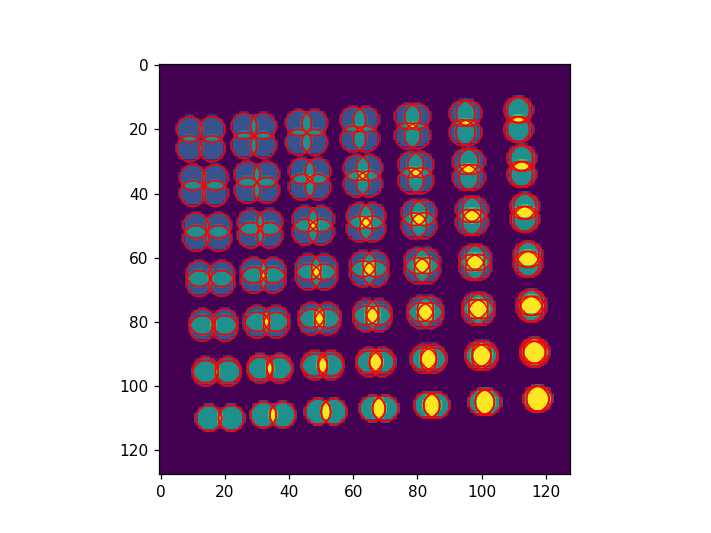

In [9]:
fig, axes = plt.subplots()
axes.imshow(data.sum(axis=(0, 1)))
for y in range(2):
    for x in range(2):
        for i in range(49):
            p = peaks[y, x, i]
            axes.add_artist(
                plt.Circle(np.flip(p), radius=4, fill=False, color='r')
            )

In [10]:
ds = ctx.load("memory", data=data, num_partitions=2)

In [11]:
%autoreload
centers = IntegrationUDF.aux_data(data=peaks, kind='nav', dtype=int, extra_shape=peaks.shape[-2:])

udf = IntegrationUDF(centers=centers, pattern=BackgroundSubtraction(radius=5, radius_outer=6))
res = ctx.run_udf(udf=udf, dataset=ds)

In [12]:
res['integration'].data

array([[[50.423096, 50.423096, 50.423096, 50.423096, 50.423096,
         50.423096, 50.423096, 50.423096, 50.423096, 50.423096,
         50.423096, 50.423096, 50.423096, 50.423096, 50.423096,
         50.423096, 50.423096, 50.423096, 50.423096, 50.423096,
         50.423096, 50.423096, 50.423096, 50.423096, 50.423096,
         50.423096, 50.423096, 50.423096, 50.423096, 50.423096,
         50.423096, 50.423096, 50.423096, 50.423096, 50.423096,
         50.423096, 50.423096, 50.423096, 50.423096, 50.423096,
         50.423096, 50.423096, 50.423096, 50.423096, 50.423096,
         50.423096, 50.423096, 50.423096, 50.423096],
        [50.423096, 50.423096, 50.423096, 50.423096, 50.423096,
         50.423096, 50.423096, 50.423096, 50.423096, 50.423096,
         50.423096, 50.423096, 50.423096, 50.423096, 50.423096,
         50.423096, 50.423096, 50.423096, 50.423096, 50.423096,
         50.423096, 50.423096, 50.423096, 50.423096, 50.423096,
         50.423096, 50.423096, 50.423096, 50.42309

In [13]:
ref_frame.sum()

50.423096